In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
cad_bonds = pd.read_csv("CAD_BOND_YIELD.csv")[["date", "BD.CDN.10YR.DQ.YLD"]].rename(columns={"BD.CDN.10YR.DQ.YLD": "CAD_10Y"})
uk_bonds = pd.read_csv("UK_BOND_YIELD.csv")[["Month", "Long"]].rename(columns={"Long": "UK_10Y"})
us_bonds = pd.read_csv("US_BOND_YIELD.csv")[["Date", "Open"]].rename(columns={"Open": "US_10Y"})
cad_bonds, uk_bonds, us_bonds

(            date  CAD_10Y
 0     2001-01-02     5.28
 1     2001-01-03     5.43
 2     2001-01-04     5.39
 3     2001-01-05     5.32
 4     2001-01-08     5.35
 ...          ...      ...
 5482  2022-11-29     2.99
 5483  2022-11-30     2.96
 5484  2022-12-01     2.83
 5485  2022-12-02     2.77
 5486  2022-12-05     2.83
 
 [5487 rows x 2 columns],
          Month    UK_10Y
 0     Jan-2010  4.426421
 1     Feb-2010  4.526235
 2     Mar-2010  4.585615
 3     Apr-2010  4.571201
 4     May-2010  4.352880
 ..         ...       ...
 127   Aug-2020  0.761598
 128   Sep-2020  0.771977
 129   Oct-2020  0.805915
 130   Nov-2020  0.889436
 131   Dec-2020  0.812770
 
 [132 rows x 2 columns],
         Date  US_10Y
 0    12/2020   0.845
 1    11/2020   0.879
 2    10/2020   0.684
 3    09/2020   0.706
 4    08/2020   0.535
 ..       ...     ...
 127  05/2010   3.693
 128  04/2010   3.838
 129  03/2010   3.626
 130  02/2010   3.611
 131  01/2010   3.793
 
 [132 rows x 2 columns])

In [3]:
us_bonds = us_bonds.astype({
    "Date": np.datetime64,
    "US_10Y": np.float64
})
us_bonds = us_bonds.rename(columns={"Date": "Month"})
us_bonds["Month"] = us_bonds["Month"].dt.to_period("M")
us_bonds = us_bonds.set_index("Month")
us_bonds

,US_10Y
Month,
2020-12,0.845
2020-11,0.879
2020-10,0.684
2020-09,0.706
2020-08,0.535
...,...
2010-05,3.693
2010-04,3.838
2010-03,3.626


In [4]:
cad_bonds = cad_bonds.astype({
    "date": np.datetime64,
    "CAD_10Y": np.float64
})
# canadian bonds per day, get average per month
cad_bonds

,date,CAD_10Y
0,2001-01-02,5.28
1,2001-01-03,5.43
2,2001-01-04,5.39
3,2001-01-05,5.32
4,2001-01-08,5.35
...,...,...
5482,2022-11-29,2.99
5483,2022-11-30,2.96
5484,2022-12-01,2.83
5485,2022-12-02,2.77


In [5]:
cad_bonds["Month"] = cad_bonds["date"].dt.to_period("M")
cad_bonds = cad_bonds.groupby("Month").mean("CAD_10Y")
cad_bonds

,CAD_10Y
Month,
2001-01,5.418636
2001-02,5.430000
2001-03,5.301364
2001-04,5.591500
2001-05,5.851364
...,...
2022-08,2.859091
2022-09,3.145500
2022-10,3.380500


In [6]:
uk_bonds["Month"] = pd.to_datetime(uk_bonds["Month"]).dt.to_period("M")

In [7]:
uk_bonds = uk_bonds.set_index("Month").astype({"UK_10Y": np.float64})
uk_bonds

,UK_10Y
Month,
2010-01,4.426421
2010-02,4.526235
2010-03,4.585615
2010-04,4.571201
2010-05,4.352880
...,...
2020-08,0.761598
2020-09,0.771977
2020-10,0.805915


In [8]:
joined = pd.concat([cad_bonds, uk_bonds, us_bonds], axis=1).dropna()
joined

,CAD_10Y,UK_10Y,US_10Y
Month,,,
2010-01,3.485000,4.426421,3.793
2010-02,3.423684,4.526235,3.611
2010-03,3.490435,4.585615,3.626
2010-04,3.670000,4.571201,3.838
2010-05,3.445500,4.352880,3.693
...,...,...,...
2020-08,0.563500,0.761598,0.535
2020-09,0.559524,0.771977,0.706
2020-10,0.602857,0.805915,0.684


In [9]:
joined["CAD_UK_spread"] = joined["UK_10Y"] - joined["CAD_10Y"]
joined["US_UK_spread"] = joined["US_10Y"] - joined["UK_10Y"]
joined["CAD_US_spread"] = joined["US_10Y"] - joined["CAD_10Y"]
joined

,CAD_10Y,UK_10Y,US_10Y,CAD_UK_spread,US_UK_spread,CAD_US_spread
Month,,,,,,
2010-01,3.485000,4.426421,3.793,0.941421,-0.633421,0.308000
2010-02,3.423684,4.526235,3.611,1.102551,-0.915235,0.187316
2010-03,3.490435,4.585615,3.626,1.095180,-0.959615,0.135565
2010-04,3.670000,4.571201,3.838,0.901201,-0.733201,0.168000
2010-05,3.445500,4.352880,3.693,0.907380,-0.659880,0.247500
...,...,...,...,...,...,...
2020-08,0.563500,0.761598,0.535,0.198098,-0.226598,-0.028500
2020-09,0.559524,0.771977,0.706,0.212453,-0.065977,0.146476
2020-10,0.602857,0.805915,0.684,0.203058,-0.121915,0.081143


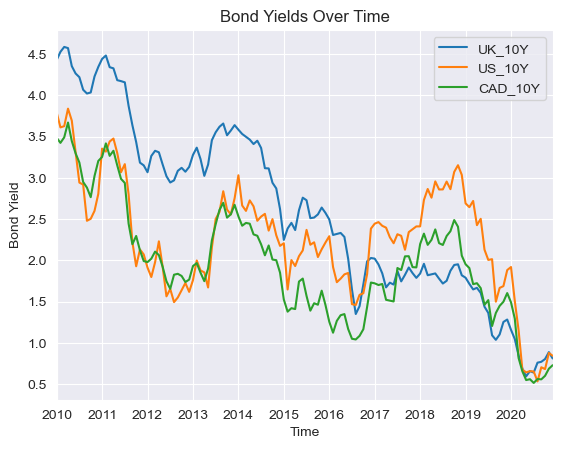

In [12]:
joined[["UK_10Y", "US_10Y", "CAD_10Y"]].plot()
plt.ylabel("Bond Yield")
plt.xlabel("Time")
plt.title("Bond Yields Over Time")
plt.savefig("BOND_YIELDS.png", format="png")

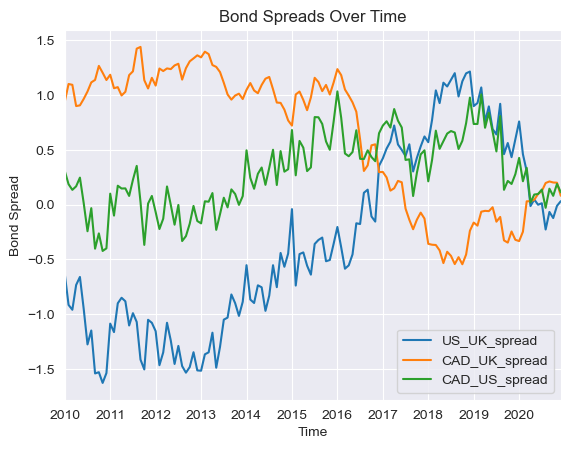

In [13]:
joined[["US_UK_spread", "CAD_UK_spread", "CAD_US_spread"]].plot()
plt.ylabel("Bond Spread")
plt.xlabel("Time")
plt.title("Bond Spreads Over Time")
plt.savefig("BOND_SPREADS.png", format="png")

In [88]:
joined.to_csv("BOND_SPREAD.csv")